<a href="https://colab.research.google.com/github/srishtysuman/NLP/blob/master/Regression_using_neural_network_on_sparse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import tensorflow as tf
from keras.layers import Dropout
from keras.regularizers import l2
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/iisc_courses_autumn_2020/DL_with_NLP/assign/assign1

/content/drive/My Drive/iisc_courses_autumn_2020/DL_with_NLP/assign/assign1


In [ ]:
start=datetime.now()
f = open("train.x.mm", "r")
count=0
train_x=np.zeros((1148,276223))
for x in f:
  if(count<2):
    count+=1
    continue  
  i=int(x.split(' ')[0])
  j=int(x.split(' ')[1])
  k=float(x.split(' ')[2])
  train_x[i,j]=k
for i in range(1,3):
  print(train_x[i])
print(train_x.shape)
train_X=train_x[1:,1:]
print(train_X.shape)
print(datetime.now()-start)

[0. 3. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
(1148, 276223)
(1147, 276222)
0:00:09.997311


In [ ]:
f=open("train.y.dat","r")
train_Y=np.zeros((1147,1))
count=0
for x in f:
  train_Y[count]=float(x)
  count+=1
train_Y.shape

(1147, 1)

In [ ]:
scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()
scaler_x.fit(train_X)
train_xscale=scaler_x.transform(train_X)
#scaler_y.fit(train_Y)
#train_yscale=scaler_y.transform(train_Y)
train_yscale=train_Y
#train_xscale=train_X

In [ ]:
#scaler_x=None
#scaler_y=None
train_x=None
train_X=None
train_Y=None
train_y=None

In [ ]:
print(train_xscale[0])
train_xscale[0].shape

[0.23076923 0.06666667 0.33333333 ... 0.         0.         0.        ]


(276222,)

In [ ]:
start=datetime.now()
f1 = open("dev.x.mm", "r")
count=0
val_x=np.zeros((318,276223))

for x in f1:
  if(count<2):
    count+=1
    continue  
  i=int(x.split(' ')[0])
  j=int(x.split(' ')[1])
  k=float(x.split(' ')[2])
  val_x[i,j]=k
for i in range(1,3):
  print(val_x[i])
print(val_x.shape)
val_X=val_x[1:,1:]
print(val_X.shape)
print(datetime.now()-start)
#val_x=None
print(val_X[0])

[0. 0. 2. ... 0. 0. 0.]
[0. 0. 9. ... 0. 0. 0.]
(318, 276223)
(317, 276222)
0:00:02.300469
[0. 2. 0. ... 0. 0. 0.]


In [ ]:
f=open("dev.y.dat","r")
val_Y=np.zeros((317,1))
count=0
for x in f:
  val_Y[count]=float(x)
  count+=1
print(val_Y.shape)
print(val_Y)

In [ ]:
val_xscale=scaler_x.transform(val_X)
#val_yscale=scaler_y.transform(val_Y)
#val_xscale=val_X
val_yscale=val_Y
val_Y=None
val_X=None

In [ ]:
#pca = PCA(n_components=1147)
#pca.fit(train_xscale)

#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of components')
#plt.ylabel('Cumulative explained variance')

In [ ]:
NCOMPONENTS = 1000

pca = PCA(n_components=NCOMPONENTS)
train_xscale1 = pca.fit_transform(train_xscale)
val_xscale1 = pca.transform(val_xscale)
pca_std = np.std(train_xscale1)


In [ ]:
from keras.layers import Activation

In [ ]:
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1000.)
model = Sequential()

#model.add(Dropout(0.2, input_shape=(1000,)))
#model.add(Dense(1000,kernel_initializer='random_normal',kernel_regularizer=l2(0.001)))
#model.add(BatchNormalization())
#model.add(Activation('tanh'))
model.add(Dense(1000, input_dim=1000, activation='relu',kernel_initializer='random_normal',kernel_regularizer=l2(0.001)))
#model.add(BatchNormalization())
#model.add(Dense(1000,kernel_initializer='random_normal',kernel_regularizer=l2(0.001)))
#model.add(BatchNormalization())
#model.add(Activation('tanh'))
#model.add(Dense(1000, activation='relu',kernel_initializer='random_normal',kernel_regularizer=l2(0.001)))
#model.add(Dense(600, activation='relu',kernel_initializer='he_uniform'))
#model.add(Dense(500, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
#model.add(Dense(500,kernel_initializer='random_normal',kernel_regularizer=l2(0.001)))
#model.add(BatchNormalization())
#model.add(Activation('tanh'))
#model.add(BatchNormalization())

#model.add(BatchNormalization())
model.add(Dense(1, activation='linear',kernel_initializer='normal'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])

In [ ]:
history=model.fit(train_xscale1, train_yscale, validation_data=(val_xscale1,val_yscale), epochs=1000, batch_size=128)

In [ ]:
print(model.predict(val_xscale1))

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

In [ ]:
history.model['']

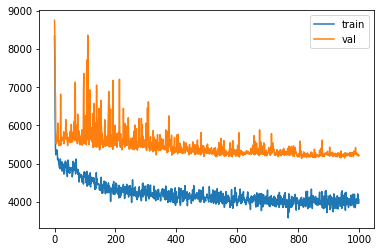

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

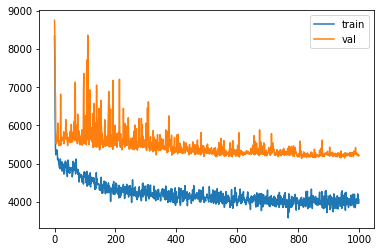

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.legend()
plt.show()

Not only do you need normalisation, but you should apply the exact same scaling as for your training data. That means storing the scale and offset used with your training data, and using that again. A common beginner mistake is to separately normalise your train and test data.

In Python and SKLearn, you might normalise your input/X values using the Standard Scaler like this:

scaler = StandardScaler()
train_X = scaler.fit_transform( train_X )
test_X = scaler.transform( test_X )
Note how the conversion of train_X using a function which fits (figures out the params) then normalises. Whilst the test_X conversion just transforms, using the same params that it learned from the train data.

In [ ]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(1000,)))
model.add(Dense(32, input_dim=1000, activation='relu',kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())

#model.add(BatchNormalization())
model.add(Dense(1, activation='linear',kernel_initializer='normal'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])

In [ ]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        #clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [ ]:
history=model.fit(train_xscale1, train_yscale, validation_data=(val_xscale1,val_yscale),callbacks=[plot_losses], epochs=1000, batch_size=128)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#for i in range(1,1148):
 ##history=model.fit(train_xscale[:i,:], train_yscale[:i,:], validation_data=(val_xscale,val_yscale), epochs=100, batch_size=5)
  #pyplot.plot(history.history['mean_absolute_error'], label='train')
  #pyplot.plot(history.history['val_mean_absolute_error'], label='val')
  #pyplot.legend()
  #pyplot.show()

In [ ]:
from keras.layers import Conv1D, Flatten


In [ ]:
model = Sequential()
model.add(Conv1D(128, 2, activation="relu", input_shape=(1000, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
#model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 999, 128)          384       
_________________________________________________________________
flatten_2 (Flatten)          (None, 127872)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8183872   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 8,184,321
Trainable params: 8,184,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_xscale1 = train_xscale1.reshape(train_xscale1.shape[0], train_xscale1.shape[1], 1)
val_xscale1 = val_xscale1.reshape(val_xscale1.shape[0], val_xscale1.shape[1], 1)
print(train_xscale1.shape)
print(val_xscale1.shape)

(1147, 1000, 1)
(317, 1000, 1)


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])

In [ ]:
history=model.fit(train_xscale1, train_yscale, validation_data=(val_xscale1,val_yscale), epochs=1000, batch_size=5)